In [1]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
#important: I had to downgrade matplotlib to 3.1.0 (pip3 install matplotlib==3.1.0)
#otherwise I will still struggle with ImportError: cannot import name 'dedent'

In [3]:
#wave boys location
#https://polar.ncep.noaa.gov/waves/validation/prod/

#please  download file from: 
#https://nomads.ncep.noaa.gov/ then Ocean Models then multi grid 
#https://nomads.ncep.noaa.gov/txt_descriptions/Wave_multi_model_forecast_doc.shtml

grib = '/home/anna/Downloads/multi_1.ak_10m.t00z.f000.grib2'
#nort west atlantic
grib = '/home/anna/Downloads/multi_1.at_10m.t00z.f000.grib2'
#east pacific
grib = '/home/anna/Downloads/multi_1.ep_10m.t00z.f000.grib2'
#wc???? west coast
grib = '/home/anna/Downloads/multi_1.wc_10m.t00z.f000.grib2'
grbs=pygrib.open(grib)
grb = grbs.select(name='Significant height of wind waves')[0]
data=grb.values
lat,lon = grb.latlons()
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

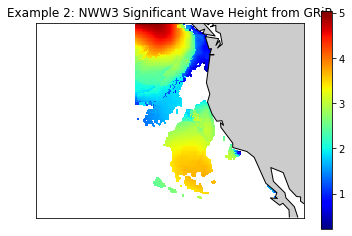

In [4]:
#west coast
x, y = m(lon,lat)
m.drawcoastlines()
m.fillcontinents()
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
plt.colorbar(cs,orientation='vertical')
plt.title('Example 2: NWW3 Significant Wave Height from GRiB')
plt.show()

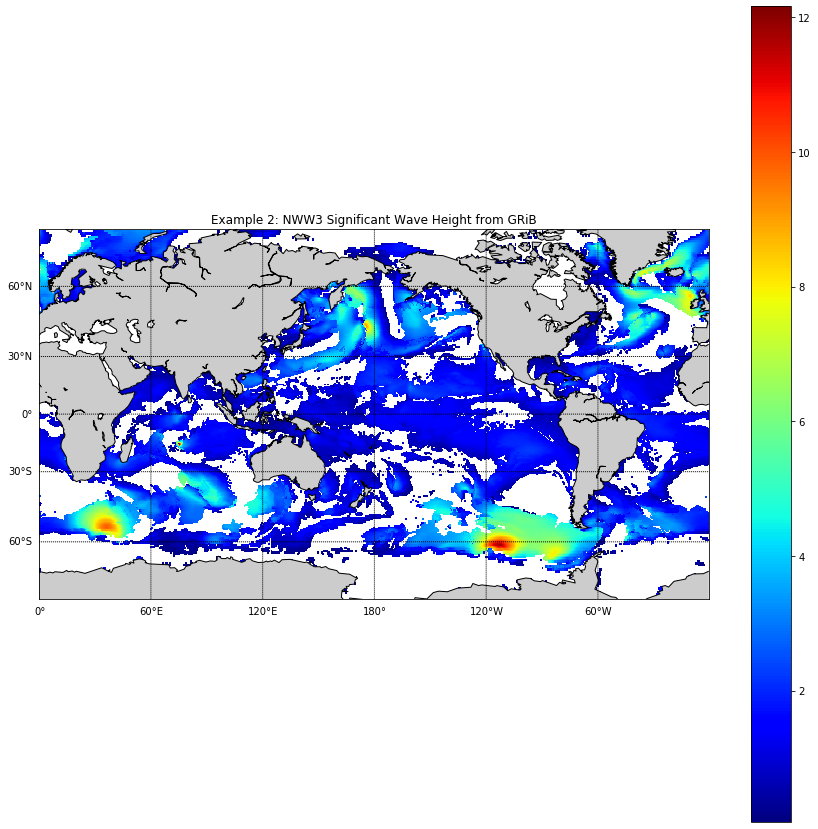

In [14]:
#visualizing global map
#grib = '/home/anna/Downloads/multi_1.glo_30m.t00z.f000.grib2'
grib = '/home/anna/Downloads/multi_1.glo_30m.t18z.f120.grib2'
grbs=pygrib.open(grib)
grb = grbs.select(name='Significant height of wind waves')[0]
data=grb.values
lat,lon = grb.latlons()

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
plt.rcParams["figure.figsize"]=15,15
x, y = m(lon,lat)
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
plt.colorbar(cs,orientation='vertical')
plt.title('Example 2: NWW3 Significant Wave Height from GRiB')
plt.show()